# House Prices - Advanced Regression Techniques

## Table of Contents

- [Project Summary](#Project-Summary)
- [Package Management](#Package-Management)
- [Project Functions](#Project-Functions)
  - [Exploratory Data Analysis Functions](#Exploratory-Data-Analysis-Functions) 
  - [Model Preparation Functions](#Model-Preparation-Functions)
  - [Model Performance Functions](#Model-Performance-Functions)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
  - [Target Variable Analysis (SalePrice)](#Target-Variable-Analysis-(SalePrice))
  - [Categorical Variable Analysis](#Categorical-Variable-Analysis)
  - [Numerical Variable Analysis](#Numerical-Variable-Analysis)
- [Feature Engineering](#Feature-Engineering)
  - [Categorical Group Binning](#Categorical-Group-Binning)
  - [Recursive Feature Elimination](#Recursive-Feature-Elimination)
- [Model Pipelines](#Model-Pipelines)
  - [Naive Model](#Naive-Model)
  - [Linear Models](#Linear-Models)
    - [General Linear Model](#General-Linear-Model)
  - [Regularization Model Pipelines](#Regularization-Model-Pipelines)
    - [Lasso Model](#Lasso-Model)
    - [Ridge](#Ridge)
    - [Stochastic Gradient Descent](#Stochastic-Gradient-Descent)
    - [Elastic Net](#Elastic-Net)
  - [Support Vector Machine](#Support-Vector-Machines)
  - [Decision Tree](#Decision-Trees)
  - [Random Forest](#Random-Forest)
  - [Gradient Boosting Machine](#Gradient-Boosting-Machine)
  - [Neural Networks](#Neural-Networks)
- [Model Fitting](#Model-Fiting)
- [Model Scoring](#Model-Scoring)
- [Model Peformance](#Model-Performance)

<a id="project-summary"></a>
## Project Summary
#### Author: Michael Curtin

The "House Prices: Advanced Regression Techniques" competition on Kaggle challenges participants to predict housing prices based on a comprehensive set of features. The dataset provided includes a wide range of explanatory variables such as neighborhood, square footage, number of bedrooms/bathrooms, and various other amenities.

The objective of the competition is to develop regression models that accurately predict the sale prices of homes. Participants are required to preprocess the data, perform feature engineering, and select appropriate regression techniques to achieve the best possible predictions.

The evaluation metric used in this competition is Root Mean Squared Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. This metric penalizes the model for both overestimations and underestimations, making it crucial to develop models that generalize well to unseen data.

In this Jupyter Notebook, we explore the dataset, conduct detailed data analysis, preprocess the data for modeling, and implement various regression algorithms such as Linear Regression, Random Forest, and Gradient Boosting. The notebook includes steps for feature engineering, handling missing values, and ensuring the models are robust and accurate.

Our final submission achieved a RMSE score of [UPDATE], demonstrating the effectiveness of our approach in predicting housing prices accurately. This notebook serves as a comprehensive overview of our methodology and results in the "House Prices: Advanced Regression Techniques" Kaggle competition.

RMSE = sqrt(1/n * Σ(yᵢ - ŷᵢ)²)

##### Kaggle Competition: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview
##### Docker Image: https://github.com/kaggle/docker-python

<a id="package-management"></a>
## Package Management

In [1]:
# Package Installation
import numpy as np 
import pandas as pd 
import os
import io
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE, RFECV

from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet, LogisticRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import LinearSVR
import xgboost

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.stats.outliers_influence import OLSInfluence # Cook's Distance
from scipy import stats #Confidence Interval
import seaborn as sns

## Load Data

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [3]:
df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
holdout_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

#data.head()
#data.shape
#holdout_data.head()
#holdout_data.shape

## Project Functions

### Exploratory Data Analysis Functions

In [4]:
def create_date_format(df):
    # Assuming df is your pandas DataFrame containing MoSold and YrSold columns
    
    # Convert MoSold to 2-digit string format (e.g., '01' for January)
    df['MoSold'] = df['MoSold'].apply(lambda x: f'{x:02}')
    
    # Create a new column 'SoldDate' combining MoSold and YrSold
    df['SoldDate'] = pd.to_datetime(df['YrSold'].astype(str) + '-' + df['MoSold'] + '-01').dt.date
    
    return df

In [5]:
# Code to determine dtypes, missing values, etc...
def analysis(read):
    
    if len(read) > 0:
        print("PROCESS HAS BEEN STARTED\n")

        print("DATA SHAPE")
        print("Observation:", read.shape[0], "Column:", read.shape[1], "\n")

        print("EXPLORE MORE ABOUT THE DATA")
        if len(read.select_dtypes("object").columns) > 0:
            print("Object Variables:", "\n", "Variables:", 
                  len(read.select_dtypes("object").columns), "\n", 
                  read.select_dtypes("object").columns.tolist(), "\n")

        if len(read.select_dtypes("integer").columns) > 0:
            print("Integer Variables:", "\n", "VVariables:", 
                  len(read.select_dtypes("integer").columns), "\n", 
                  read.select_dtypes("integer").columns.tolist(), "\n")

        if len(read.select_dtypes("float").columns) > 0:
            print("Float Variables:", "\n", "Variables:", 
                  len(read.select_dtypes("float").columns), "\n", 
                  read.select_dtypes("float").columns.tolist(), "\n")

        if len(read.select_dtypes("bool").columns) > 0:
            print("Bool Variables:", "\n", "Variables:", 
                  len(read.select_dtypes("bool").columns), "\n", 
                  read.select_dtypes("bool").columns.tolist(), "\n")

        print("IS THERE ANY MISSING VALUE")
        print(" \n ", np.where(read.isnull().values.any() == False,"No missing value!", "Data includes missing value!"), "\n")

        buf = io.StringIO()
        read.info(buf=buf)
        check = True
        check = buf.getvalue().split('\n')[-2].split(":")[1].strip()
        print("MEMORY \n", check)

    else:
        print("ERROR!")

    return read

In [6]:
# Inspect Missing Values
def data_cleaning(df):

    print("*********{} *********".format('Inspecting missing values'))
    
    data = df.isna().sum().reset_index().sort_values(by=0, ascending=False)
    clean_data = data[data[0] != 0].shape[0]
    columns = df.shape[1]
    rows = df.shape[0]
    data.columns = ["name", "missing appearences"]
    data["%missing from total"] = data[data["missing appearences"]!=0]["missing appearences"]/rows
    mis_data = data[data["%missing from total"] > 0.5].shape[0]
    #drop_data = np.array(data[data["%missing from total"] > 0.5]["name"])
    
    print("{}/{} total missing data in terms of column shape.".format(clean_data, columns))
    #print("{}/{} columns  will be dropped. name of the drop column is {}".format(mis_data, columns,drop_data))
    
    return data#, drop_data

In [7]:
def histogram_numerical_plots(data):
    data_x = data.copy()
    # Select numerical columns
    num_cols = data_x.select_dtypes(include=['int64', 'float64'])
    # Create subset DataFrame with only numerical values
    data_x_num_cols = data_x[num_cols.columns]
    
    # Calculate number of columns for subplot
    num_columns = len(data_x_num_cols.columns)
    
    # Determine number of rows for subplot
    num_rows = (num_columns // 3) + 1  # Adjust the number of columns per row as needed

    # Create a figure with specified size
    plt.figure(figsize=(30, 20))  # Adjust figsize as needed

    # Plot histograms for each numerical column
    for i, col in enumerate(data_x_num_cols.columns):
        plt.subplot(num_rows, 3, i + 1)  # Adjust the number of columns per row as needed
        plt.hist(data_x_num_cols[col], bins=25)
        plt.title(col)

    # Adjust layout
    plt.tight_layout()

    # Display the plot
    plt.show()

In [8]:
def histogram_numerical_plots(data):
    data_x = data.copy()
    # Select numerical columns
    num_cols = data_x.select_dtypes(include=['int64', 'float64'])
    # Create subset DataFrame with only numerical values
    data_x_num_cols = data_x[num_cols.columns]
    data_x_num_cols.hist(bins=25, figsize=(40,30))
    plt.show()

In [9]:
# Pearson's R
def corr_matrix(data):
    data_x = data.copy()
    # Select numerical columns
    num_cols = data_x.select_dtypes(include=['int64', 'float64'])
    corr_cols = data_x[num_cols.columns]
    corr_matrix = corr_cols.corr()
    corr_matrix = corr_matrix["SalePrice"].sort_values(ascending=False)
    return corr_matrix

In [10]:
# Univariate Analysis (Compare Train/Test Splits)
def univariate_eda(data, target, var) -> dict:
    if data[var].dtype == 'object':
        data[var] = np.where(data[var].isna(), "NaN", data[var])
        train = data.loc[data['TRAIN_INDEX'] == 1]
        test = data.loc[data['TRAIN_INDEX'] == 0]
        train_grp = train[[var,target]].groupby(var).agg(['count','mean'])
        test_grp = test[[var,target]].groupby(var).agg(['count','mean'])
        grp = pd.merge(train_grp, test_grp, how='outer', left_index=True, right_index=True)
        grp.columns = ['Count_Train', 'SalePrice_Train', 'Count_Test', 'SalePrice_Test']
        print(grp)
        
        count_max = max([max(grp['Count_Train']),max(grp['Count_Test'])])
        sev_max = max([max(grp['SalePrice_Train']),max(grp['SalePrice_Test'])])
        
        df_count = grp[['Count_Train', 'Count_Test']].copy()
        df_sev = grp[['SalePrice_Train', 'SalePrice_Test']].copy()
        
        x = np.arange(len(df_count.index))
        width = 0.3
        multiplier = 0 
        
        fig, ax1 = plt.subplots(constrained_layout=True)
        
        for attribute, measurement in df_count.items():
            offset = width + multiplier
            rects = ax1.bar(x + offset, measurement, width, label=attribute)
            multiplier += 1
            
        ax1.set_title('numerical: ' + var)
        
        ax1.set_ylabel('Counts')
        ax1.set_xticks(x)
        ax1.set_xticklabels(df_count.index, rotation=90)
        ax1.legend(loc='upper left')
        
        ax2 = ax1.twinx()
        ax2.set_ylabel('SalePrice')
        ax2.plot(df_sev.index, df_sev['SalePrice_Train'], c='blue', label='SalePrice_Train')
        ax2.plot(df_sev.index, df_sev['SalePrice_Test'], c='darkorange', label='SalePrice_Test')
        ax2.legend(loc='upper right')
    else:
        data_temp = data.copy()
        data_temp['DECILE'] = pd.qcut(data_temp[var], 10, labels=False, duplicates='drop')                   
        temp = data.copy()
        temp['DECILE'] = pd.qcut(temp[var], 10, duplicates='drop')
        data_grp = temp[['DECILE', target]].groupby('DECILE').agg(['count','mean']).reset_index()
        data_grp.columns = [var+'_BOUNDARY', 'Count', 'SalePrice']
        data_grp = data_grp.drop(['Count', 'SalePrice'], axis=1)
        
        train = data_temp.loc[data_temp['TRAIN_INDEX'] == 1]
        test = data_temp.loc[data_temp['TRAIN_INDEX'] == 0]
        
        train_temp = train.copy()
        train_grp = train_temp[['DECILE', target]].groupby('DECILE').agg(['count','mean'])
        train_grp.columns = ['Count_Train', 'SalePrice_Train']
        
        test_temp = test.copy()
        test_grp = test_temp[['DECILE', target]].groupby('DECILE').agg(['count','mean'])
        test_grp.columns = ['Count_Test', 'SalePrice_Test']
        
        grp = pd.merge(data_grp, train_grp, how='outer', left_index=True, right_index=True)
        grp = pd.merge(grp, test_grp, how='outer', left_index=True, right_index=True)
        
        df_count = grp[['Count_Train', 'Count_Test']].copy()
        df_sev = grp[['SalePrice_Train', 'SalePrice_Test']].copy()
        
        x = np.arange(len(df_count.index))
        width = 0.3
        multiplier = 0
        
        fig, ax1 = plt.subplots(constrained_layout=True)
        
        for attribute, measurement in df_count.items():
            offset = width * multiplier
            rects = ax1.bar(x + offset, measurement, width, label=attribute)
            multiplier +=1
            
        ax1.set_title('numerical: ' + var)
        
        ax1.set_ylabel('Counts')
        ax1.set_xticks(x)
        ax1.set_xticklabels(df_count.index, rotation=90)
        ax1.legend(loc='upper left')

        ax2 = ax1.twinx()
        ax2.set_ylabel('SalePrice')
        ax2.plot(df_sev.index, df_sev['SalePrice_Train'], label='SalePrice_Train')
        ax2.plot(df_sev.index, df_sev['SalePrice_Test'], label='SalePrice_Test')
        ax2.legend(loc='upper right')
        return 

def check_cardinality(data):
    # Select columns of object type
    object_columns = data.select_dtypes(include=['object']).columns
    
    # Dictionary to store cardinality for each column
    cardinality_dict = {}
    
    # Iterate over object columns and calculate cardinality
    for column in object_columns:
        cardinality = data[column].nunique()  # Count unique values
        cardinality_dict[column] = cardinality
    
    # Sort cardinality_dict by values (cardinality) in descending order
    cardinality_dict_sorted = {k: v for k, v in sorted(cardinality_dict.items(), key=lambda item: item[1], reverse=True)}
    return cardinality_dict_sorted

### Model Preparation Functions

In [11]:
def split_data(df, test_size=0.30, random_state=None):
    train_data, test_data = train_test_split(df, test_size=test_size, random_state=random_state)
    train_data['TRAIN_INDEX'] = 1
    test_data['TRAIN_INDEX'] = 0
    train_test_data = pd.concat([train_data, test_data], ignore_index=True)
    print(f"Train data size: {train_data.shape}")
    print(f"Test data size: {test_data.shape}")
    print(f"Train/Test data size: {train_test_data.shape}")
    return train_data, test_data, train_test_data

### Modeling Performance Functions

In [12]:
def lift_chart(data, pred, act, model_type):
    data['Prediction_Decile'] = pd.qcut(data[pred], 20, labels=False, duplicates='drop')
    lift_chart_prediction = data.groupby('Prediction_Decile')[pred].mean().reset_index()
    lift_chart_actual = data.groupby('Prediction_Decile')[act].mean().reset_index()
    
    plt.figure(figsize=(10, 6))  # Set the figure size correctly here
    plt.plot(lift_chart_prediction['Prediction_Decile'], lift_chart_prediction[pred], label='Predicted', color='red')
    plt.plot(lift_chart_actual['Prediction_Decile'], lift_chart_actual[act], label='Actual', color='black')
    plt.xlabel("Prediction Decile")
    plt.ylabel("Average Cost")  # Adjust ylabel based on your data
    plt.legend(loc="upper right")
    plt.title(f"Model Performance Lift Chart - {model_type}")
    plt.grid(True)
    plt.show()
    return

# Define the main evaluation function
def evaluate_pipelines(pipelines, X_train, y_train, X_test, y_test, model_types):
    results = []
    
    for pipeline, model_type in zip(pipelines, model_types):
        # Fit the pipeline
        pipeline.fit(X_train, y_train)
        
        # Predictions
        y_pred = pipeline.predict(X_test)
        
        # R^2 score
        r2 = r2_score(y_test, y_pred)
        #print(f"{model_type} Model R^2 Score: {r2}")
        
        # Evaluation metrics
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mean_error = mean_absolute_error(y_test, y_pred)
        mean_percent_error = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
        
        print(f"{model_type} Model Evaluation Metrics:")
        print(f"Model R^2 Score: {r2}")
        print(f"RMSE: {rmse}")
        print(f"Mean Error: {mean_error}")
        print(f"Mean Percent Error: {mean_percent_error}%")
        
        results.append({
            'model_type': model_type,
            'R^2 Score': r2,
            'RMSE': rmse,
            'Mean Error': mean_error,
            'Mean Percent Error': mean_percent_error
        })
        
        # Generate the lift chart
        lift_chart_data = pd.DataFrame({'pred': y_pred, 'act': y_test})
        lift_chart(lift_chart_data, 'pred', 'act', model_type)
        
    return results

    
def print_model_details(models):
    for i, glm_model in enumerate(models):
        coefficients = glm_model.coef_
        intercept = glm_model.intercept_
        print(f"Model {i+1}:")
        print("Intercept:", intercept)
        print("Coefficients:", coefficients)
        print()  # For separating different models

In [13]:
#  evaluate_actual_prediction_period(lift_chart_data, 'pred', 'act')
def evaluate_actual_prediction_period(data, pred, actual):
    data = data.copy()
    #data['YrSold'] = pd.to_datetime(data['YrSold'], format='%Y')
    
    data_count = data.groupby(data['YrSold'].dt.year)[pred].count().to_frame(name='Count').reset_index()
    data_actual = data.groupby(data['YrSold'].dt.year)[actual].mean().to_frame(name='Actual').reset_index()
    data_prediction = data.groupby(data['YrSold'].dt.year)[pred].mean().to_frame(name='Prediction').reset_index()
    
    data_combined = pd.merge(data_count, data_actual, how='inner', left_on='YrSold', right_on='YrSold')
    data_combined = pd.merge(data_combined, data_prediction, how='inner', left_on='YrSold', right_on='YrSold')
    data_combined.set_index('YrSold', inplace=True)
    
    df_count = data_combined[['Count']].copy()
    df_cost = data_combined[['Actual', 'Prediction']].copy()
    
    x = np.arange(len(df_count.index))
    width = 0.3
    multiplier = 0
    
    fig, ax1 = plt.subplots(constrained_layout=True)
    
    for attribute, measurement in df_count.items():
        offset = width * multiplier
        rects = ax1.bar(x + offset, measurement, width, label=attribute)
        multiplier += 1
    
    ax1.set_title("SalePrice Actual vs. Predicted over YrSold")
    ax1.set_ylabel('Counts')
    ax1.set_xticks(x)
    ax1.set_xticklabels(df_count.index, rotation=90)
    ax1.legend(loc='upper left')
    ax1.set_ylim(0, 1000000)
    
    ax2 = ax1.twinx()
    ax2.set_ylabel("SalePrice")
    ax2.plot(x, df_cost['Actual'], label='Actual', color='black', marker='o')
    ax2.plot(x, df_cost['Prediction'], label='Prediction', color='red', marker='s')
    ax2.legend(loc='upper right')
    
    plt.show()

In [14]:
# Understanding Outliers

## Cook's Distance

## Leverage

In [15]:
# Variable Correlation Analysis

## T-Testing

## Chi-Square Test

from scipy.stats import chi2_contingency

def chi_square_test(df, col1, col2):
    """
    Perform chi-square test of independence between two categorical variables in a DataFrame.

    Parameters:
    df (DataFrame): Pandas DataFrame containing the categorical variables.
    col1 (str): Name of the first categorical column.
    col2 (str): Name of the second categorical column.

    Returns:
    chi2_stat (float): The test statistic of the chi-square test.
    p_val (float): The p-value of the test.
    dof (int): Degrees of freedom.
    contingency_table (DataFrame): The contingency table showing the observed frequencies.
    """

    # Create contingency table
    contingency_table = pd.crosstab(df[col1], df[col2])
    
    # Perform chi-square test
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    
    return chi2_stat, p_val, dof, contingency_table

## P-Value Testing

## One-Way Analysis

## VIF Calculations

## Correlation Matrix

## Principal Component Analysis (PCA)

## Exploratory Data Analysis 

In [16]:
# Execute Analysis, Data Cleaning Functions

create_date_format(df)

# Create Train/Test/Holdout Dataframes
train_data, test_data, train_test_data = split_data(df, random_state=42)

output = analysis(train_data)
missing = data_cleaning(train_data)
missing_data = data_cleaning(train_data)
missing_data.head()

Train data size: (1022, 83)
Test data size: (438, 83)
Train/Test data size: (1460, 83)
PROCESS HAS BEEN STARTED

DATA SHAPE
Observation: 1022 Column: 83 

EXPLORE MORE ABOUT THE DATA
Object Variables: 
 Variables: 45 
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition', 'SoldDate'] 

Integer Variables: 
 VVariables: 35 
 ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalB

,name,missing appearences,%missing from total
72,PoolQC,1017,0.995108
74,MiscFeature,982,0.960861
6,Alley,956,0.935421
73,Fence,820,0.802348
25,MasVnrType,590,0.577299


### Target Variable Analysis (SalePrice)

In [17]:
train_data['SalePrice'].describe()
#train_data.info() - No Missing SalePrice

count      1022.000000
mean     181312.692759
std       77617.461005
min       34900.000000
25%      130000.000000
50%      165000.000000
75%      215000.000000
max      745000.000000
Name: SalePrice, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


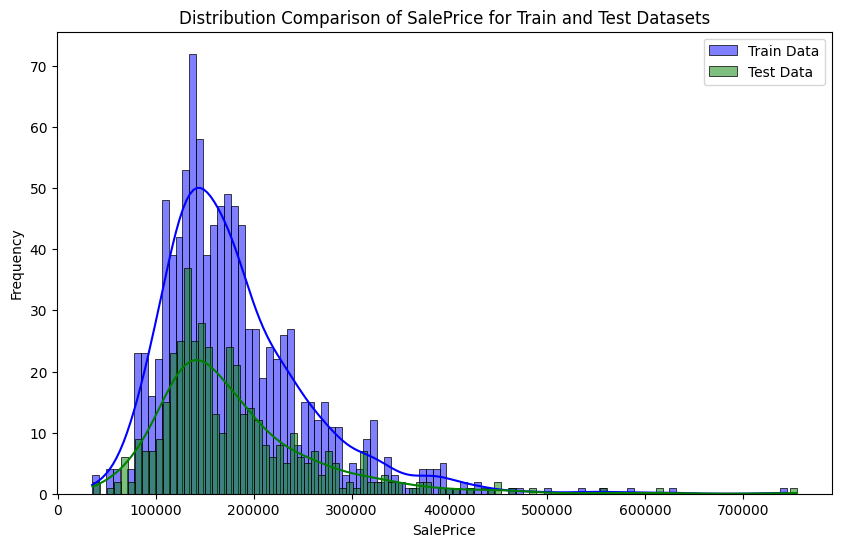

In [18]:
# Plotting SalePrice Distributions for Train/Test Data
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], kde=True, color='blue', alpha=0.5, bins=100, label='Train Data')
sns.histplot(test_data['SalePrice'], kde=True, color='green', alpha=0.5, bins=100, label='Test Data')

# Customizing the plot
plt.title('Distribution Comparison of SalePrice for Train and Test Datasets')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### Understanding Distribution Shape (Kurtosis Calculation)

In [19]:
# Kurtosis
kurtosis_data_train = train_data['SalePrice']
train_kurtosis_value = kurtosis_data_train.kurtosis()

kurtosis_data_test = test_data['SalePrice']
test_kurtosis_value = kurtosis_data_test.kurtosis()

print(f"Train Kurtosis Value: {train_kurtosis_value}")
print(f"Train Kurtosis Value: {test_kurtosis_value}")

Train Kurtosis Value: 5.787011246790756
Train Kurtosis Value: 7.832917560109307


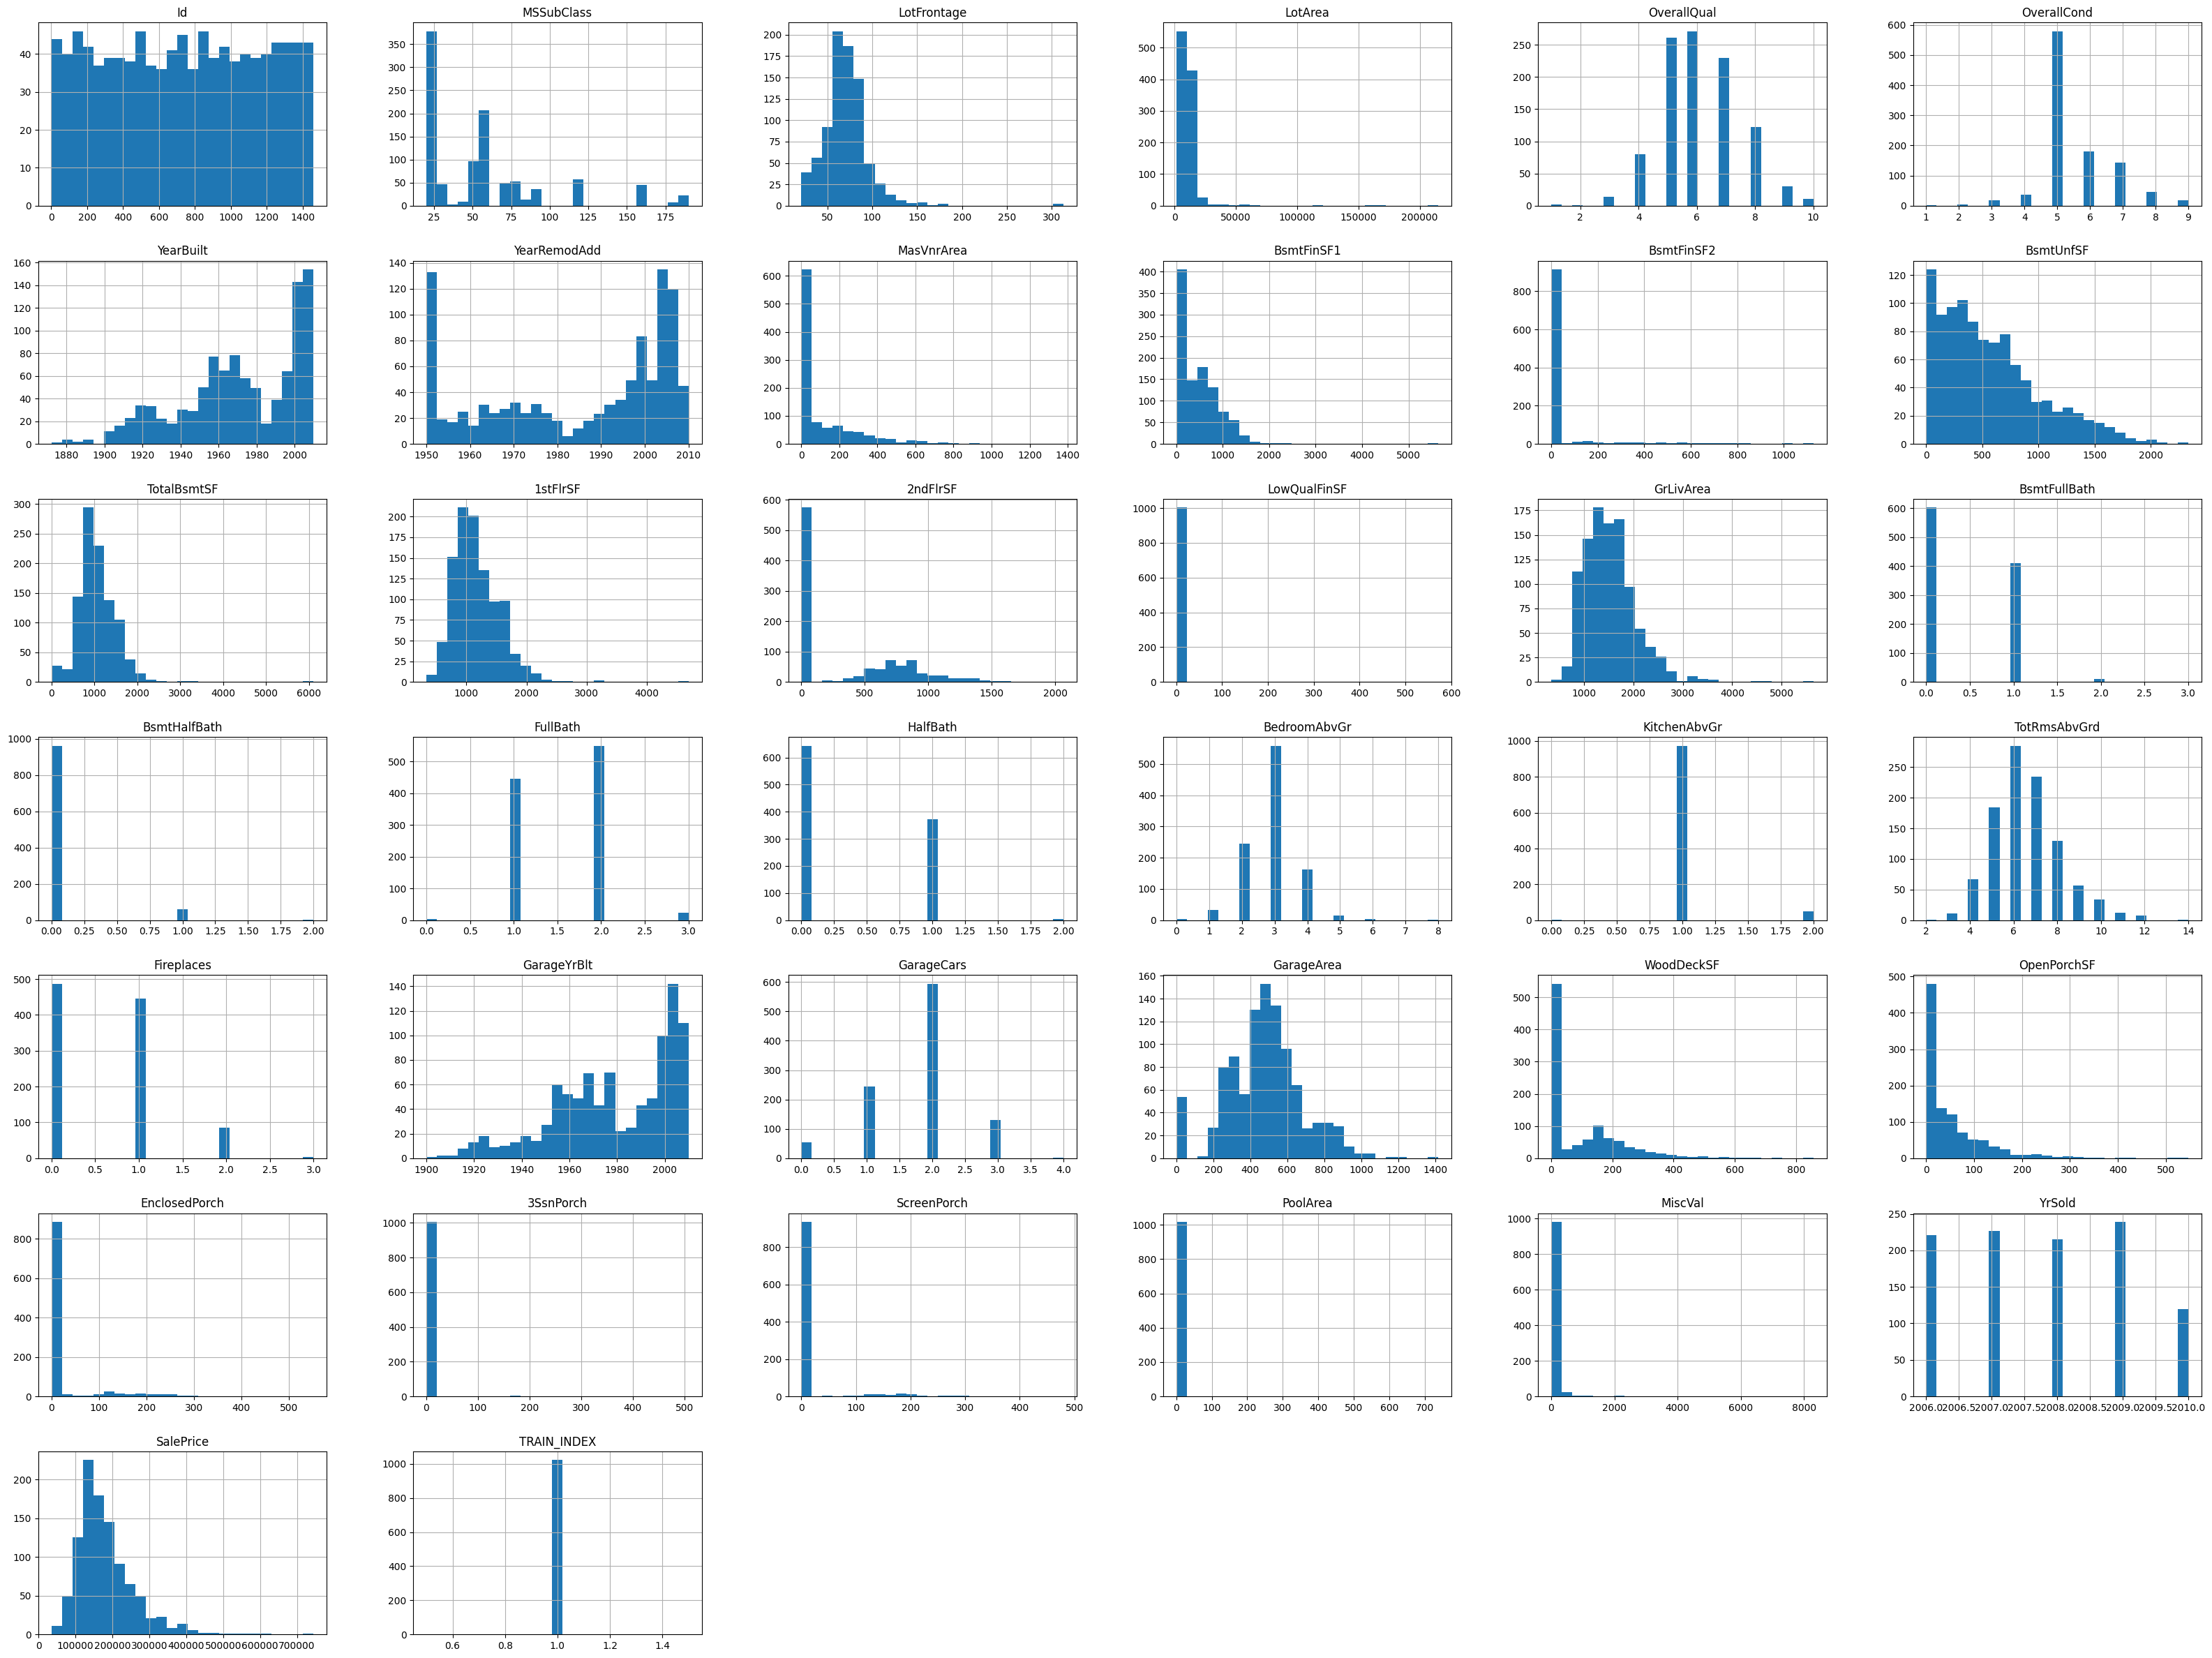

In [21]:
### Exploratory Data Analysis
histogram_numerical_plots(train_data)

In [22]:
### Pearson's R Output
corr_matrix(train_data)

SalePrice        1.000000
OverallQual      0.784720
GrLivArea        0.689238
GarageCars       0.642689
GarageArea       0.621937
TotalBsmtSF      0.590017
1stFlrSF         0.583132
FullBath         0.549164
TotRmsAbvGrd     0.519634
YearBuilt        0.512206
YearRemodAdd     0.512190
GarageYrBlt      0.474363
Fireplaces       0.461329
MasVnrArea       0.454514
BsmtFinSF1       0.360559
LotFrontage      0.340251
WoodDeckSF       0.331151
2ndFlrSF         0.314904
HalfBath         0.278889
OpenPorchSF      0.277547
LotArea          0.262896
BsmtFullBath     0.228331
BsmtUnfSF        0.223321
BedroomAbvGr     0.159879
PoolArea         0.138324
ScreenPorch      0.119974
3SsnPorch        0.059417
LowQualFinSF    -0.002201
BsmtFinSF2      -0.009665
YrSold          -0.012761
MiscVal         -0.016525
Id              -0.034812
BsmtHalfBath    -0.052806
OverallCond     -0.071461
MSSubClass      -0.094099
KitchenAbvGr    -0.146972
EnclosedPorch   -0.147502
TRAIN_INDEX           NaN
Name: SalePr

### SalePrice Time Series Analysis

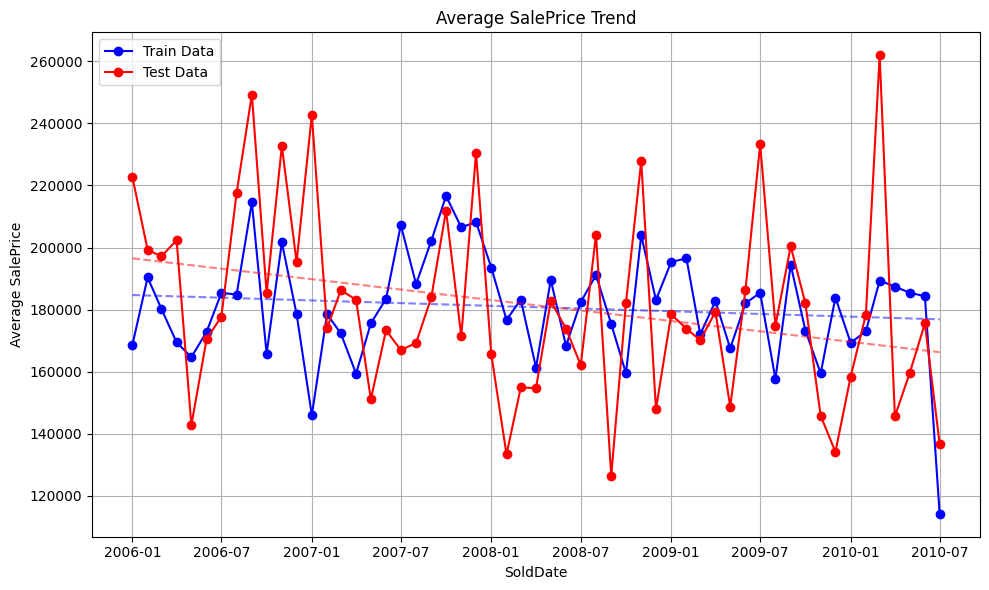

In [23]:
train_data['SoldDate'] = pd.to_datetime(train_data['SoldDate'])
test_data['SoldDate'] = pd.to_datetime(test_data['SoldDate'])
train_data_mean_price = train_data.groupby('SoldDate')['SalePrice'].mean().reset_index()
test_data_mean_price = test_data.groupby('SoldDate')['SalePrice'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# Plot train_data average values and trend line
plt.plot(train_data_mean_price['SoldDate'], train_data_mean_price['SalePrice'], marker='o', linestyle='-', color='b', label='Train Data')

# Fit a linear trendline for train_data
train_dates_numeric = pd.to_numeric(train_data_mean_price['SoldDate'])
z_train = np.polyfit(train_dates_numeric, train_data_mean_price['SalePrice'], 1)
p_train = np.poly1d(z_train)
plt.plot(train_data_mean_price['SoldDate'], p_train(train_dates_numeric), linestyle='--', color='b', alpha=0.5)

# Plot test_data average values and trend line
plt.plot(test_data_mean_price['SoldDate'], test_data_mean_price['SalePrice'], marker='o', linestyle='-', color='r', label='Test Data')

# Fit a linear trendline for test_data
test_dates_numeric = pd.to_numeric(test_data_mean_price['SoldDate'])
z_test = np.polyfit(test_dates_numeric, test_data_mean_price['SalePrice'], 1)
p_test = np.poly1d(z_test)
plt.plot(test_data_mean_price['SoldDate'], p_test(test_dates_numeric), linestyle='--', color='r', alpha=0.5)

# Add labels and title
plt.xlabel('SoldDate')
plt.ylabel('Average SalePrice')
plt.title('Average SalePrice Trend')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

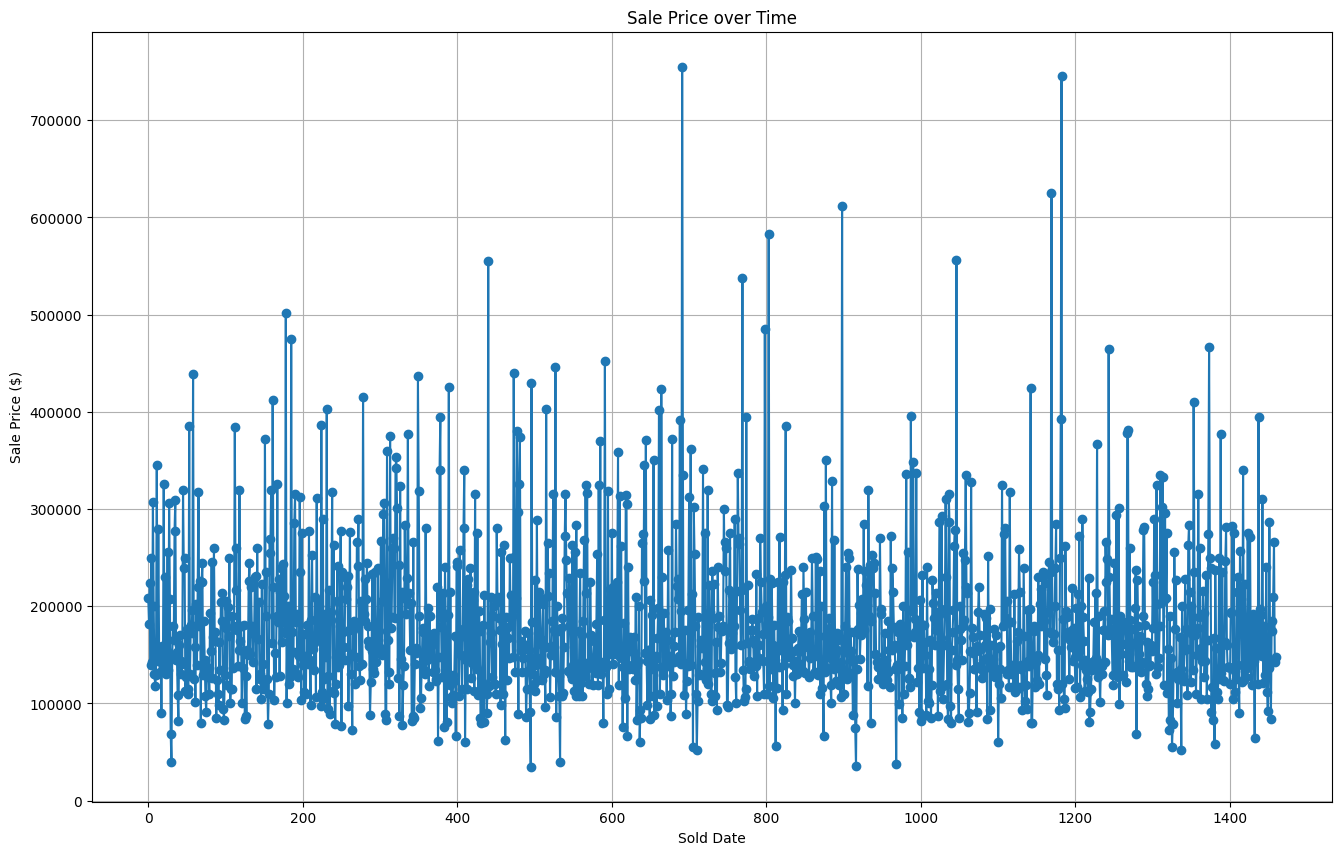

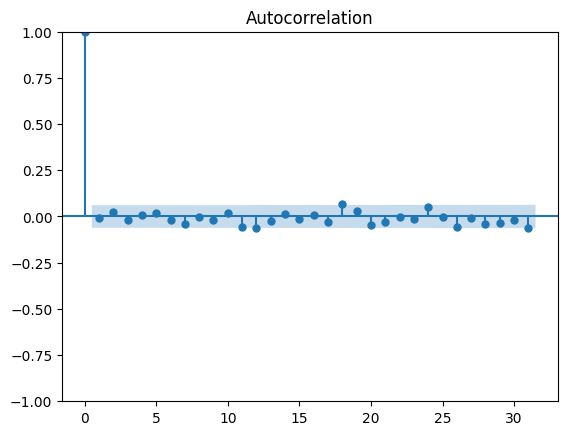

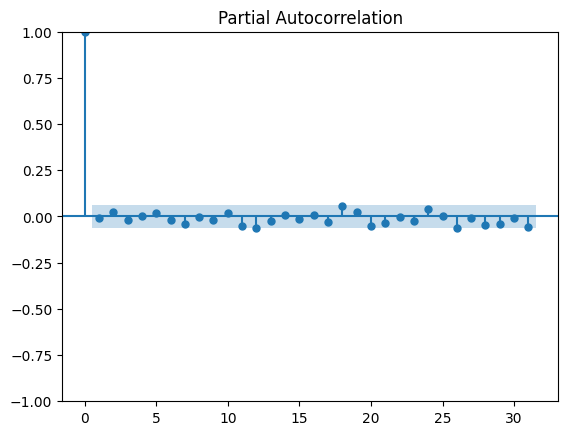

In [24]:
### AutoCorrelation and Partial AutoCorrelation Plots

# AutoCorrelationFunction and PartialAutoCorrelationFunction Plots
time_series_train_data = train_data
time_series_train_data['SoldDate'] = pd.to_datetime(time_series_train_data['SoldDate'])
time_series_train_data.set_index('SoldDate', inplace=True)

plt.figure(figsize=(16, 10))
plt.plot(df.index, df['SalePrice'], marker='o')
plt.title('Sale Price over Time')
plt.xlabel('Sold Date')
plt.ylabel('Sale Price ($)')
plt.grid(True)
plt.show()


plot_acf(time_series_train_data['SalePrice'])
plt.show()

plot_pacf(time_series_train_data['SalePrice'])
plt.show()

### Feature Engineering

In [25]:
# Create Univariate Plots for All Categorical and Numerical Variables
all_variable_list = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 
                 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 
                 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 
                 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
                 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 
                 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
                 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 
                 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
                 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt']

#for var in all_variable_list:
#    univariate_eda(train_test_data, 'SalePrice', var)

In [26]:
# Understand High-Levels of Cardinality for Categorical Variables
check_cardinality(train_data)

{'Neighborhood': 25,
 'Exterior2nd': 16,
 'Exterior1st': 14,
 'MoSold': 12,
 'Condition1': 9,
 'SaleType': 9,
 'HouseStyle': 8,
 'RoofMatl': 7,
 'Functional': 7,
 'Condition2': 6,
 'RoofStyle': 6,
 'Foundation': 6,
 'BsmtFinType1': 6,
 'BsmtFinType2': 6,
 'Heating': 6,
 'GarageType': 6,
 'SaleCondition': 6,
 'MSZoning': 5,
 'LotConfig': 5,
 'BldgType': 5,
 'ExterCond': 5,
 'HeatingQC': 5,
 'FireplaceQu': 5,
 'GarageQual': 5,
 'GarageCond': 5,
 'LotShape': 4,
 'LandContour': 4,
 'ExterQual': 4,
 'BsmtQual': 4,
 'BsmtCond': 4,
 'BsmtExposure': 4,
 'Electrical': 4,
 'KitchenQual': 4,
 'Fence': 4,
 'MiscFeature': 4,
 'LandSlope': 3,
 'MasVnrType': 3,
 'GarageFinish': 3,
 'PavedDrive': 3,
 'PoolQC': 3,
 'Street': 2,
 'Alley': 2,
 'Utilities': 2,
 'CentralAir': 2}

#### Numerical Variables

In [27]:
### Continuous Variable Strategies
    
#def log_transformation(data):
    
#def sqrt_transformation(data):

### Data Transformer

In [28]:
X_train = train_data.drop(columns=['SalePrice'])  # Replace 'target_column_name' with your actual target column name
y_train = train_data['SalePrice']

X_test = test_data.drop(columns=['SalePrice'])
y_test = test_data['SalePrice']

class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, selected_features):
        self.selected_features = selected_features
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.selected_features]

# Define selected features (numerical and categorical)
numerical_features = ['LotArea','MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                      'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
                      'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
                      'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
                      '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

categorical_features = ['KitchenQual', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour','YrSold'] #, 'Utilities', 'LotConfig', 
                        #'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', #'Condition2 - Missing Levels
                        #'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 
                        #'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 
                        #'CentralAir', 'Electrical', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                        #'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

# Create pipelines for numerical and categorical preprocessing
numerical_pipeline = Pipeline([
    ('num_selector', FeatureSelector(numerical_features)),
    ('rfe', RFE(estimator=RandomForestRegressor(), n_features_to_select=10)), 
    ('imputer', SimpleImputer(strategy='median')),  # Mean Imputation
    #('scaler', MinMaxScaler()) #StandardScaler())
])

categorical_pipeline = Pipeline([
    ('cat_selector', FeatureSelector(categorical_features)),
    ('encoder', OneHotEncoder())
])

# Combine numerical and categorical pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Assuming train_data and test_data are defined earlier

# Fit the preprocessor on training data
preprocessor.fit(X_train, y_train)

# Get the selected features from RFE
selected_features = preprocessor.named_transformers_['num'].named_steps['rfe'].get_support(indices=True)

# Print the top 5 selected features
top_10_features = [numerical_features[idx] for idx in selected_features]
print("Top 10 RFE selected features:", top_10_features)

Top 10 RFE selected features: ['MSSubClass', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'WoodDeckSF', 'OpenPorchSF']


### Model Pipelines

### Naive Model

In [29]:
# Naive Model


### Linear Models

In [30]:
## Linear Regression
ols_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('glm', LinearRegression())  # Replace with your GLM model
])

## Tweedie
#tweedie_pipeline = Pipeline([
#    ('preprocessor', preprocessor),
#    ('regressor', sm.GLM(y_train, X_train, family=sm.families.Tweedie(link=sm.families.links.log, var_power=1.1)))
#])

## Inverse Gaussian
#inverse_gaussian_pipeline = Pipeline([
#    ('preprocessor', preprocessor),
#    ('glm', GeneralizedLinearRegressor(family=InverseGaussian()))
#])

## Logistic/Binomial
logistic_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('logistic', LogisticRegression())
])

## Multinomial

### Regularization Model Pipelines (Lasso, Ridge, Stochastic Gradient Descent, Elastic Net)

In [31]:
# Lasso Model
lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('lasso', Lasso(alpha=0.1, max_iter=1000))
])

# Ridge Model
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('ridge', Ridge(alpha=1, solver="cholesky", max_iter=1000))
])

# Stochastic Gradient Descent Model
stochastic_gradient_descent_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('stochastic_gradient_descent', SGDRegressor(penalty="l2"))
])

# Elastic Net Model
elastic_net_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('elastic_net', ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=1000))
])

### Support Vector Machines

In [32]:
# Support Vector Machine Regression
support_vector_machine_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('support_vector_machine', LinearSVR(epsilon=1.5))
])

### Decision Tree

In [33]:
# Decision Tree Regressor
decision_tree_regressor_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('decision_tree_regressor', DecisionTreeRegressor(max_depth=2))
])

### Random Forest

In [34]:
# Decision Tree Regressor
random_forest_regressor_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('random_forest_regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

### Gradient Boosting Machine

In [35]:
# Gradient Boosting Regressor
gradient_boosting_regressor_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('gradient_boosting_regressor', GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate=1.0))
])

# XGBoost Regressor
xgboost_regressor_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('xgboost_regressor', xgboost.XGBRegressor())
])

### Neural Network

In [36]:
# Recurrent Neural Network


# Feedforward Neural Network


# Generative Adversarial Network


# Convolutional Neural Network


## Model Fitting and Evaluation

Ordinay Least Squared Model Evaluation Metrics:
Model R^2 Score: 0.8324830634221427
RMSE: 34189.8945594398
Mean Error: 22543.702163198
Mean Percent Error: 13.384967901253153%


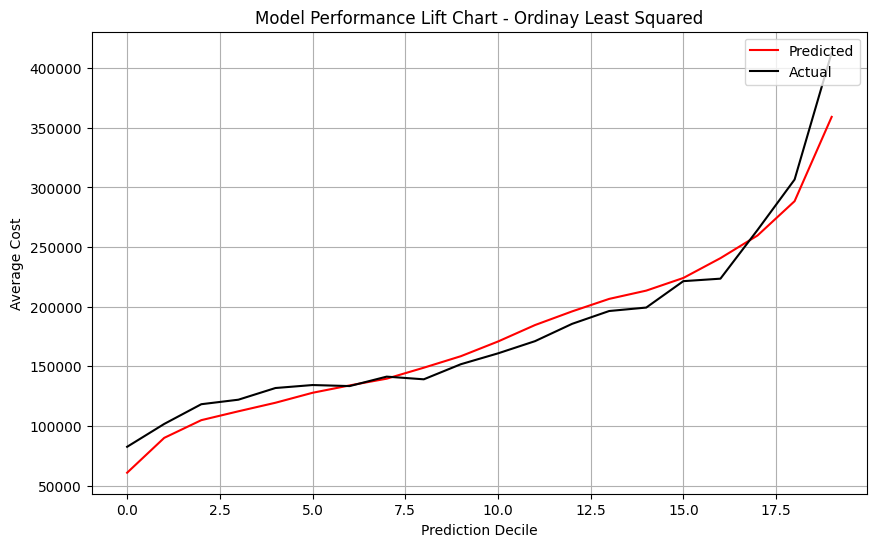

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Pipeline Model Evaluation Metrics:
Model R^2 Score: 0.4201140423927284
RMSE: 63612.094627009545
Mean Error: 41584.09132420091
Mean Percent Error: 23.598751961416532%


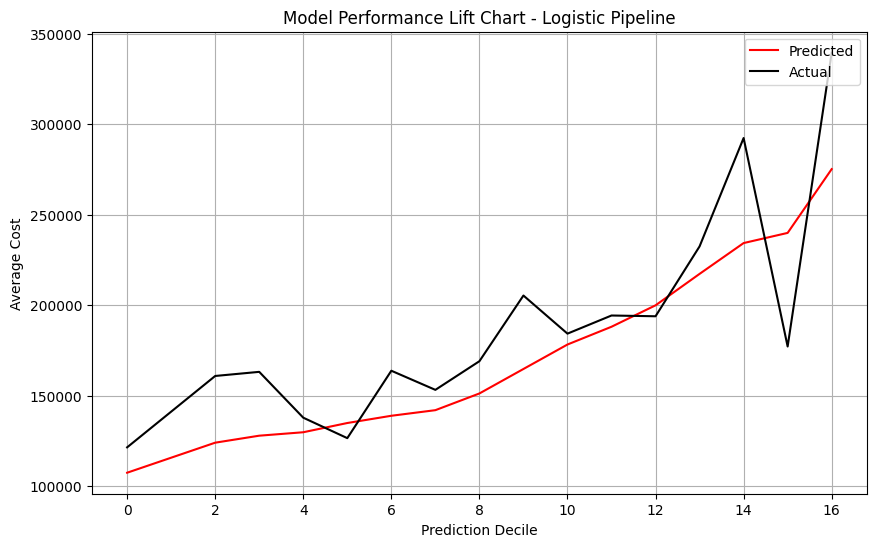

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.000e+11, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


Lasso Model Model Evaluation Metrics:
Model R^2 Score: 0.8324923570884177
RMSE: 34188.94613630203
Mean Error: 22542.96109007137
Mean Percent Error: 13.384532767355386%


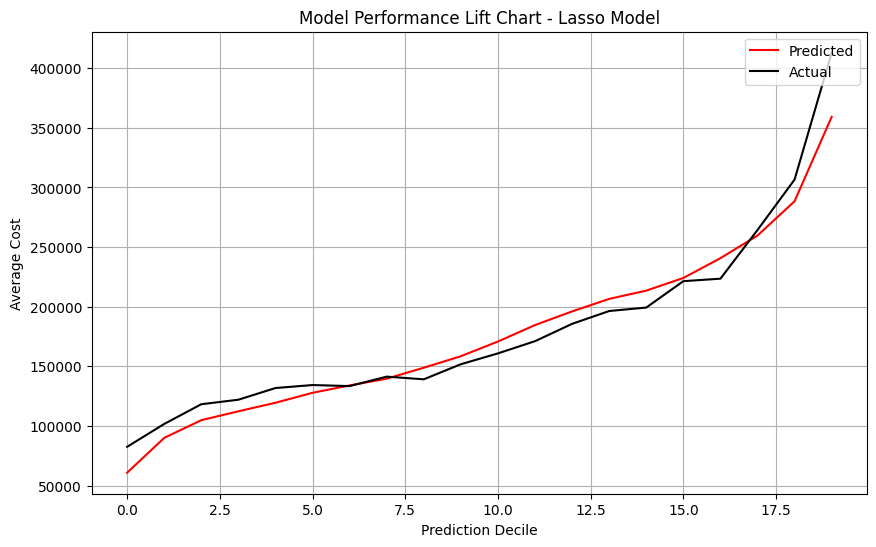

Ridge Model Model Evaluation Metrics:
Model R^2 Score: 0.8329706358113816
RMSE: 34140.10199367097
Mean Error: 22512.50600503106
Mean Percent Error: 13.372326889162784%


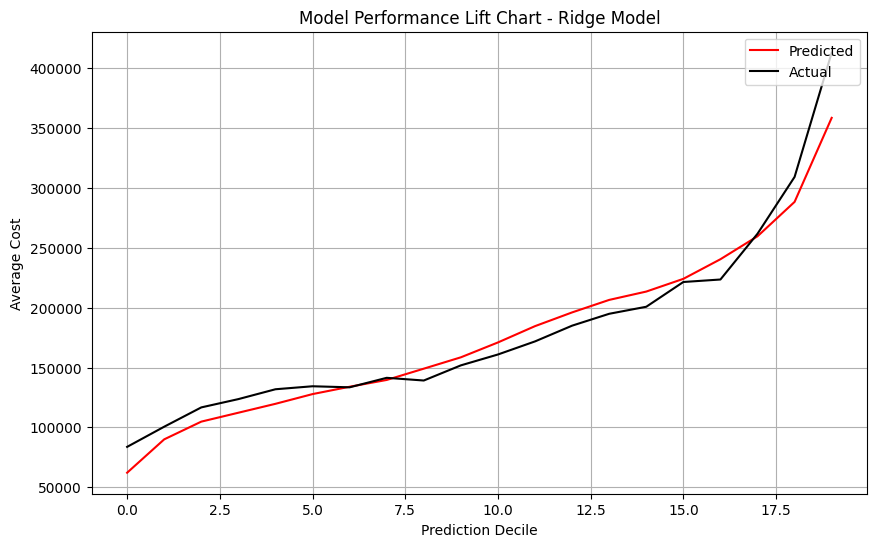

Stochastic Gradient Descent Model Model Evaluation Metrics:
Model R^2 Score: -1.9744226807397397e+22
RMSE: 1.173784758374679e+16
Mean Error: 1.047015316147297e+16
Mean Percent Error: 7483502244038.005%


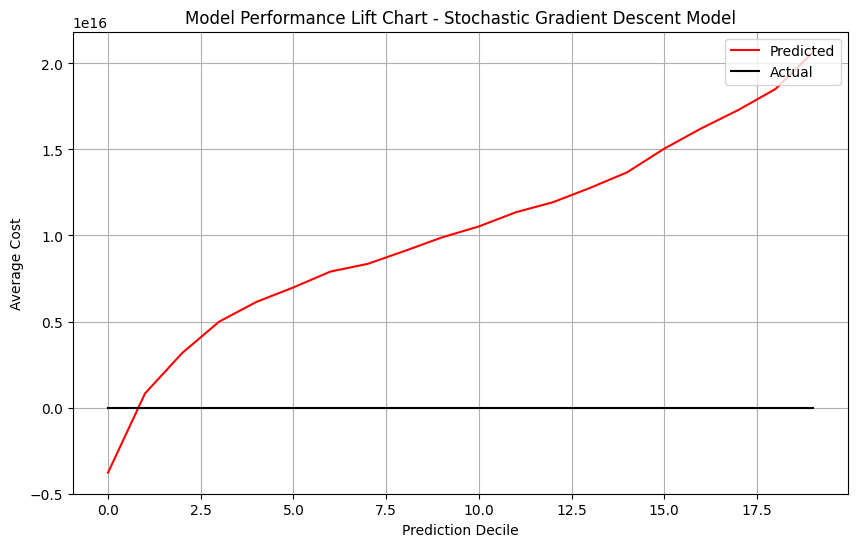

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.674e+11, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


Elastic Net Model Model Evaluation Metrics:
Model R^2 Score: 0.833301382847832
RMSE: 34106.28358978378
Mean Error: 21702.253988417026
Mean Percent Error: 12.797960090229418%


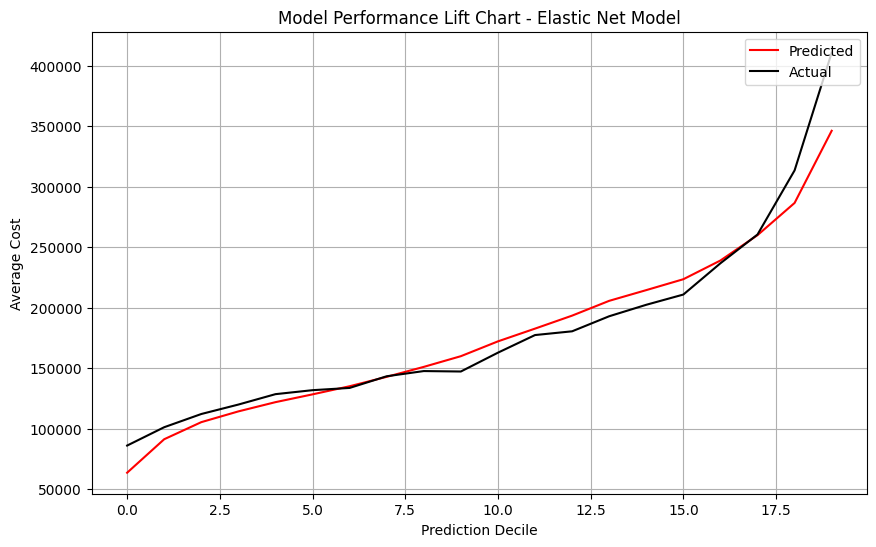

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Support Vector Machine Model Model Evaluation Metrics:
Model R^2 Score: 0.6410035354939202
RMSE: 50051.083796149156
Mean Error: 35868.5381011115
Mean Percent Error: 19.990204795473392%


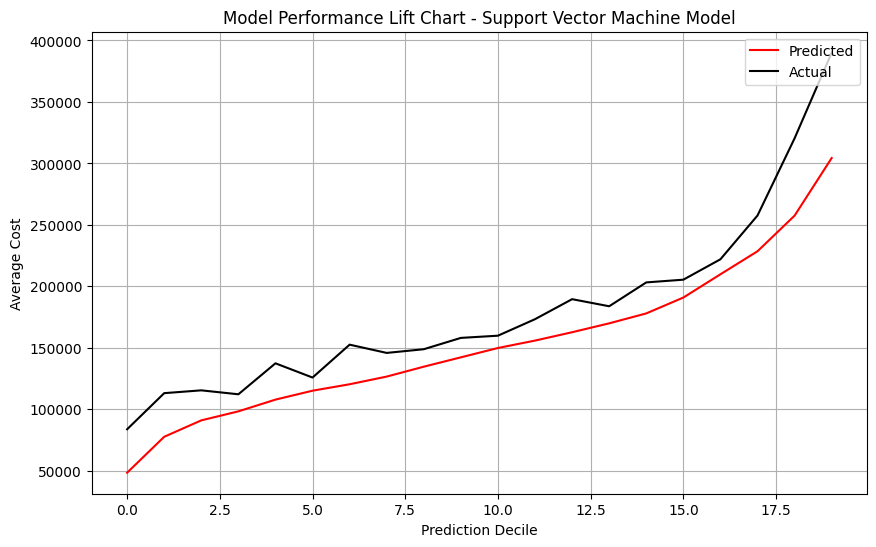

Decision Tree Model Model Evaluation Metrics:
Model R^2 Score: 0.646595207970684
RMSE: 49659.76011164193
Mean Error: 34904.48031064854
Mean Percent Error: 22.223201485180503%


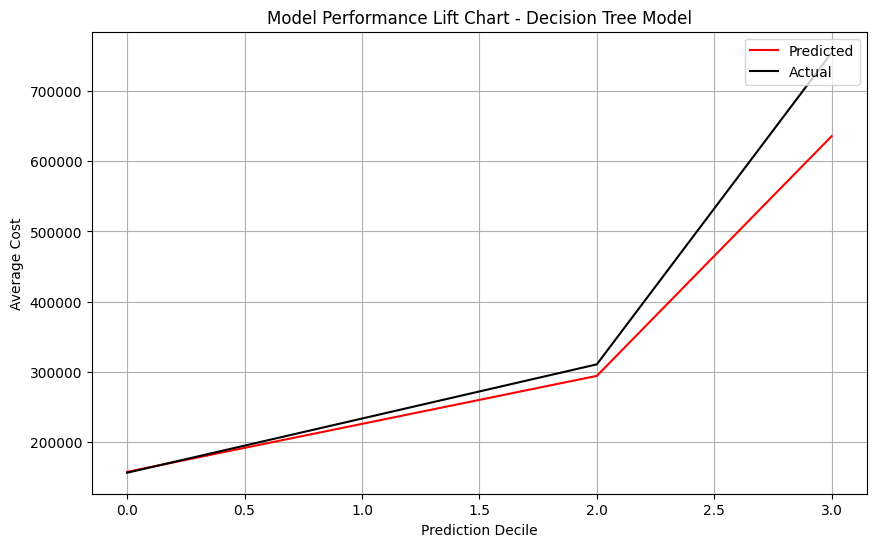

Random Forest Model Model Evaluation Metrics:
Model R^2 Score: 0.9033520948853145
RMSE: 25969.561869400888
Mean Error: 17330.9979543379
Mean Percent Error: 10.59810190466358%


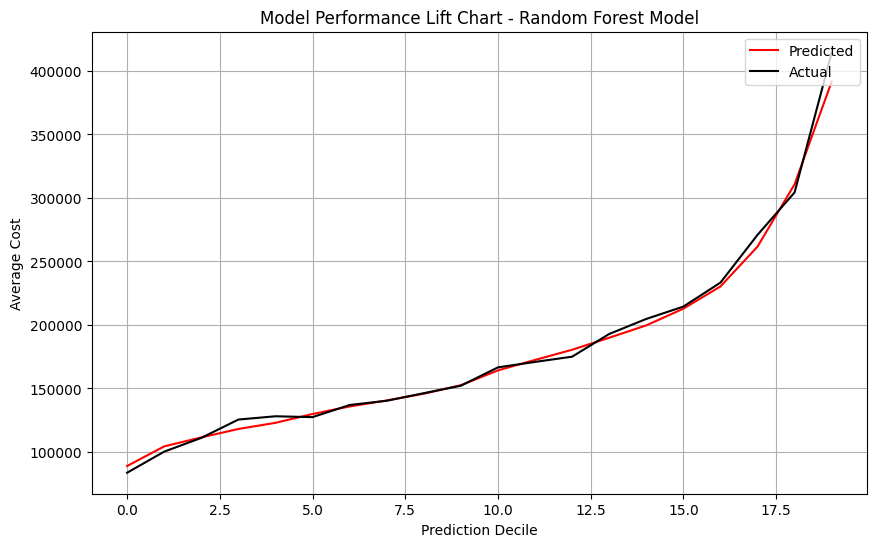

Gradient Boosting Model Model Evaluation Metrics:
Model R^2 Score: 0.8305871047238184
RMSE: 34382.830999633916
Mean Error: 22927.144053542328
Mean Percent Error: 13.859926418157114%


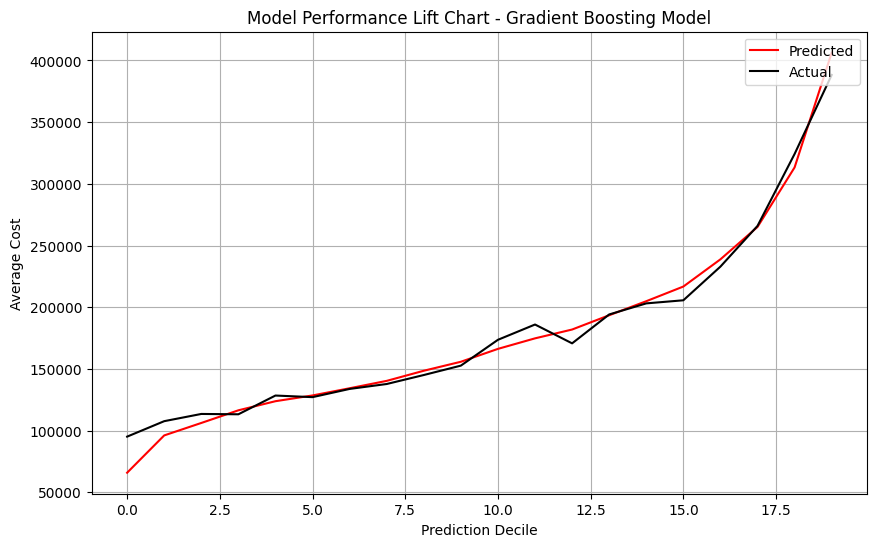

XGBoost Model Model Evaluation Metrics:
Model R^2 Score: 0.8893771396750372
RMSE: 27783.748693271817
Mean Error: 18630.60519228025
Mean Percent Error: 11.042276927506164%


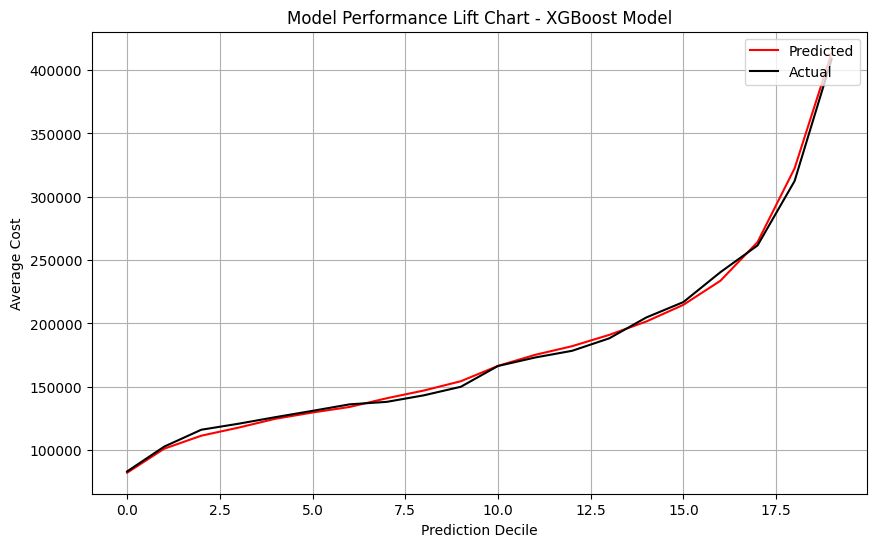

Model Type: Ordinay Least Squared
R^2 Score: 0.8324830634221427
RMSE: 34189.8945594398
Mean Error: 22543.702163198
Mean Percent Error: 13.384967901253153%
-----------------------------
Model Type: Logistic Pipeline
R^2 Score: 0.4201140423927284
RMSE: 63612.094627009545
Mean Error: 41584.09132420091
Mean Percent Error: 23.598751961416532%
-----------------------------
Model Type: Lasso Model
R^2 Score: 0.8324923570884177
RMSE: 34188.94613630203
Mean Error: 22542.96109007137
Mean Percent Error: 13.384532767355386%
-----------------------------
Model Type: Ridge Model
R^2 Score: 0.8329706358113816
RMSE: 34140.10199367097
Mean Error: 22512.50600503106
Mean Percent Error: 13.372326889162784%
-----------------------------
Model Type: Stochastic Gradient Descent Model
R^2 Score: -1.9744226807397397e+22
RMSE: 1.173784758374679e+16
Mean Error: 1.047015316147297e+16
Mean Percent Error: 7483502244038.005%
-----------------------------
Model Type: Elastic Net Model
R^2 Score: 0.833301382847832
RMS

In [37]:
# Update to add Pipelines
pipelines = [ols_pipeline, logistic_pipeline, lasso_pipeline, ridge_pipeline, stochastic_gradient_descent_pipeline, elastic_net_pipeline,
            support_vector_machine_pipeline, decision_tree_regressor_pipeline, random_forest_regressor_pipeline,
            gradient_boosting_regressor_pipeline, xgboost_regressor_pipeline]

model_types = ['Ordinay Least Squared', 'Logistic Pipeline', 'Lasso Model', 'Ridge Model', 'Stochastic Gradient Descent Model', 'Elastic Net Model',
              'Support Vector Machine Model', 'Decision Tree Model', 'Random Forest Model', 'Gradient Boosting Model', 'XGBoost Model']

results = evaluate_pipelines(pipelines, X_train, y_train, X_test, y_test, model_types)

# Print or use results as needed
for result in results:
    print(f"Model Type: {result['model_type']}")
    print(f"R^2 Score: {result['R^2 Score']}")
    print(f"RMSE: {result['RMSE']}")
    print(f"Mean Error: {result['Mean Error']}")
    print(f"Mean Percent Error: {result['Mean Percent Error']}%")
    print("-----------------------------")

In [38]:
#### Excess CODE ####


# #IGNORE FOR NOW

# # ARMA

# # Fit ARMA model
# arma_model = ARMA(time_series_train_data['SalePrice'], order=(p, q))  # Replace p, q with chosen values
# arma_results = arma_model.fit()

# # Print summary of the model
# # print(arma_results.summary())

# # ARIMA
# # ACF and PACF plots after differencing
# diff = time_series_train_data['SalePrice'].diff().dropna()  # Differencing to make the series stationary

# plot_acf(diff)
# plt.show()

# plot_pacf(diff)
# plt.show()

# # Fit ARIMA model
# arima_model = ARIMA(time_series_train_data['SalePrice'], order=(p, d, q))  # Replace p, d, q with chosen values
# arima_results = arima_model.fit()

# # Print summary of the model
# print(arima_results.summary())
# # Augmented Dickey-Fuller Test
# series = train_data[['SalePrice']].series()
# result = adfuller(series, autolag='AIC') 
# Extracting the values from the results: 
#     print('ADF Statistic: %f' % result[0]) 
#     print('p-value: %f' % result[1]) print('Critical Values:') 
#     for key, value in result[4].items(): 
#         print('\t%s: %.3f' % (key, value)) 
#         if result[0] < result[4]["5%"]: 
#             print ("Reject Ho - Time Series is Stationary") 
#             else:
#                 ("Failed to Reject Ho - Time Series is Non-Stationary")


## Fit ARMA model (ARMA(p, q) is equivalent to ARIMA(p, 0, q))
#arma_model = ARIMA(time_series_train_data['SalePrice'], order=(3, 0, 5))
#arma_results = arma_model.fit()

# Print summary of the model
#print(arma_results.summary())

# Plot residuals
#residuals = arma_results.resid
#plt.figure(figsize=(10, 4))
#plt.plot(residuals)
#plt.title('Residuals of ARMA Model')
#plt.show()